In [10]:
import string
import json
import csv
import re
import networkx as nx
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
from nltk import bigrams
import tweepy as tw
import nltk
from nltk.corpus import stopwords
import warnings
import textblob
warnings.filterwarnings("ignore")
 
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

## Loading the Excel Document

In [11]:
tweets = pd.read_csv('EndPeriodShame.csv')

## How it looks.

In [12]:
tweets.head()

,timestamp,tweet_text,username,all_hashtags,followers_count
0,11/26/2019 0:31,b'Tuesday #ootd Liner #8inch #gruffalo by #da...,b'rebelperiod',"['ootd', '8inch', 'gruffalo', 'daisyandbird', ...",60
1,11/25/2019 13:44,"b'Ladies, during your first menstruation perio...",b'GhettoRadio895',"['endperiodshame', 'Huuwezo', 'Goteana']",139252
2,11/25/2019 7:09,b'#endperiodshame I was aware but my great fea...,b'Rosebel33871050',['endperiodshame'],98
3,11/25/2019 7:00,"b'Ladies, during your first menstruation perio...",b'GhettoRadio895',"['endperiodshame', 'Huuwezo', 'Brekko']",139252
4,11/25/2019 4:45,"b'From pads, tampons through to maternity wear...",b'MyDawaApp',"['SiDawaTu', 'MYDAWABlackFriday', 'BlackFriday...",1817


In [13]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
timestamp          86 non-null object
tweet_text         86 non-null object
username           86 non-null object
all_hashtags       86 non-null object
followers_count    86 non-null int64
dtypes: int64(1), object(4)
memory usage: 3.5+ KB


## Sample Tweets.

In [14]:
for row in tweets['tweet_text'][:5]:
    
    print (row)

b'Tuesday #ootd  Liner #8inch #gruffalo by #daisyandbird  Underwear #grannypanties #thegoldengirls by #harebrained  Dress by #citychic  #rebelliousmenstruation #endperiodshame #bekindtoyourvulva https://t.co/YSBgPMTkUO'
b'Ladies, during your first menstruation period, did you have enough and detailed information on how to go about it? #endperiodshame @this_ability_ke #Huuwezo  #Goteana https://t.co/dIXkHqU9QX'
b'#endperiodshame I was aware but my great fear what if the pad falls down, https://t.co/kMrB81sriS'
b'Ladies, during your first menstruation period, did you have enough and detailed information on how to go about it? #endperiodshame @this_ability_ke  #Huuwezo #Brekko https://t.co/dZVJcuang6'
b'From pads, tampons through to maternity wear, Natural Cottons provides choice for women at any stage\xf0\x9f\x91\xa9\xf0\x9f\x91\xa7  Shop now for 10% Off the range this Black Friday  https://t.co/SDO5YWTadp  #SiDawaTu #MYDAWABlackFriday #BlackFriday #ThisIsCottons #periodornotshecan #endp

## Removing unwanted texts.

In [15]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

## Sample tweets without funny characters.

In [16]:
all_tweets_no_urls = [remove_url(tweet) for tweet in tweets['tweet_text']]
all_tweets_no_urls = list(tweet.replace('b','',1) for tweet in all_tweets_no_urls)
all_tweets_no_urls[:5]

['Tuesday ootd Liner 8inch gruffalo by daisyandbird Underwear grannypanties thegoldengirls by harebrained Dress by citychic rebelliousmenstruation endperiodshame bekindtoyourvulva',
 'Ladies during your first menstruation period did you have enough and detailed information on how to go about it endperiodshame thisabilityke Huuwezo Goteana',
 'endperiodshame I was aware but my great fear what if the pad falls down',
 'Ladies during your first menstruation period did you have enough and detailed information on how to go about it endperiodshame thisabilityke Huuwezo Brekko',
 'From pads tampons through to maternity wear Natural Cottons provides choice for women at any stagexf0x9fx91xa9xf0x9fx91xa7 Shop now for 10 Off the range this Black Friday SiDawaTu MYDAWABlackFriday BlackFriday ThisIsCottons periodornotshecan endperiodshame']

## Sample words used in the tweet

In [17]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['tuesday',
  'ootd',
  'liner',
  '8inch',
  'gruffalo',
  'by',
  'daisyandbird',
  'underwear',
  'grannypanties',
  'thegoldengirls',
  'by',
  'harebrained',
  'dress',
  'by',
  'citychic',
  'rebelliousmenstruation',
  'endperiodshame',
  'bekindtoyourvulva'],
 ['ladies',
  'during',
  'your',
  'first',
  'menstruation',
  'period',
  'did',
  'you',
  'have',
  'enough',
  'and',
  'detailed',
  'information',
  'on',
  'how',
  'to',
  'go',
  'about',
  'it',
  'endperiodshame',
  'thisabilityke',
  'huuwezo',
  'goteana']]

## How frequent a word appears.

In [18]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(20)


[('endperiodshame', 85),
 ('the', 64),
 ('to', 61),
 ('and', 59),
 ('by', 42),
 ('in', 34),
 ('of', 29),
 ('a', 28),
 ('is', 25),
 ('endperiodpoverty', 24),
 ('you', 23),
 ('with', 21),
 ('on', 20),
 ('rebelliousmenstruation', 18),
 ('i', 17),
 ('women', 17),
 ('ootd', 16),
 ('bekindtoyourvulva', 16),
 ('girls', 16),
 ('underwear', 15)]

In [19]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(20),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,endperiodshame,85
1,the,64
2,to,61
3,and,59
4,by,42


# Graphically.

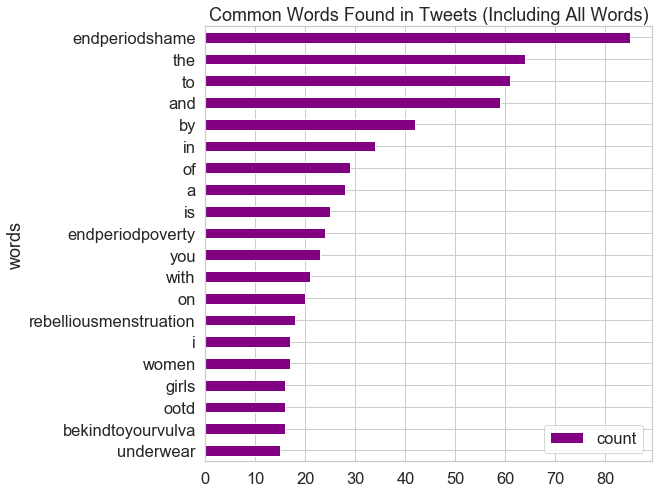

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

## Sample common English words.

In [21]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

["hasn't",
 's',
 'you',
 'mightn',
 'hasn',
 "doesn't",
 'had',
 'shouldn',
 'he',
 'd']

## Removing common English words.

In [22]:
# Remove stop words
tweets_nsw = [[word for word in tweet_words if not word in stop_words] for tweet_words in words_in_tweet]

tweets_nsw[0]

['tuesday',
 'ootd',
 'liner',
 '8inch',
 'gruffalo',
 'daisyandbird',
 'underwear',
 'grannypanties',
 'thegoldengirls',
 'harebrained',
 'dress',
 'citychic',
 'rebelliousmenstruation',
 'endperiodshame',
 'bekindtoyourvulva']

## Most common words without common English words.

In [23]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('endperiodshame', 85),
 ('endperiodpoverty', 24),
 ('rebelliousmenstruation', 18),
 ('women', 17),
 ('ootd', 16),
 ('bekindtoyourvulva', 16),
 ('girls', 16),
 ('underwear', 15),
 ('harebrained', 15),
 ('liner', 14),
 ('8inch', 13),
 ('menstruation', 13),
 ('period', 13),
 ('thisabilityke', 12),
 ('need', 10)]

# Graphically.

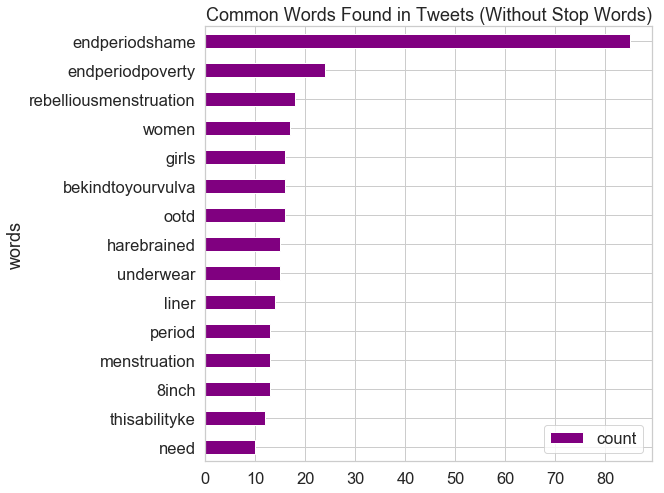

In [24]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

# Removing # tags

In [25]:
wordscollected = []
for row in tweets['all_hashtags']:
    mess=row
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    wordscollected.append(nopunc.split())
    collection = []
    for roe in wordscollected:
        collection.append(list(roe))
        collection_words = []
    for i in collection:
        for j in i:
            collection_words.append(j)
print(list(set(collection_words)))

['periodequity', 'BlackFriday', 'MyFirstTimeBook', 'bleedingrainbow', 'seekdiscomfort', 'thegoldengirls', 'puppet', 'rabbit', 'endbodyshaming', 'periodemoji', 'MHM', 'menstruationeducation', 'endgirlshame', 'PeriodEmoji', 'octopus', 'womeninsport', '100items', 'stars', 'puremenstruation', 'Endperiodshame', 'swampmonster', 'thpurplepanda', 'endperiodpoverty', 'destash', '7inch', 'andiemadeit', 'twins', 'talkaboutit', 'ThisIsCottons', 'citychic', 'SiDawaTu', 'periodsarenormal', '8inch', 'earntheirwings', 'endperiodshame', 'scarletcloth', 'unstereotype', 'handmadebyhedi', 'bekindtoyourvulva', 'taxfreeperiod', 'ghostbusters', 'krampus', 'gruffalo', 'hpplctamponfairies', 'sewmandakaye', 'EndPeriodStigma', 'EndPeriodshame', 'sunshinebums', 'ravenclaw', 'evildead', 'makeclothmainstream', 'gwyf', 'GirlsWithNoLimits', 'girlpower', 'novelred', 'maliceinwonderland', 'endthiscrisis', 'whale', 'virtouspads', 'mermaid', 'homelessperiodireland', 'thefutureisfemale', 'sexualreproductivehealth', 'EndPe

## Common words without stop words and #tag word

In [26]:
tweets_nsw_nc = [[w for w in word if not w in collection_words]for word in tweets_nsw]
tweets_nsw[0]

['tuesday',
 'ootd',
 'liner',
 '8inch',
 'gruffalo',
 'daisyandbird',
 'underwear',
 'grannypanties',
 'thegoldengirls',
 'harebrained',
 'dress',
 'citychic',
 'rebelliousmenstruation',
 'endperiodshame',
 'bekindtoyourvulva']

In [27]:
tweets_nsw_nc[0]

['tuesday', 'liner', 'underwear']

# Common words and their frequency.

In [28]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)


[('women', 17),
 ('girls', 16),
 ('underwear', 15),
 ('liner', 14),
 ('period', 13),
 ('thisabilityke', 12),
 ('need', 10),
 ('periods', 10),
 ('disabilities', 9),
 ('shame', 9),
 ('first', 8),
 ('menstrual', 8),
 ('stigma', 8),
 ('kewise254', 8),
 ('hygiene', 6)]

In [29]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,women,17
1,girls,16
2,underwear,15
3,liner,14
4,period,13


# Graphically

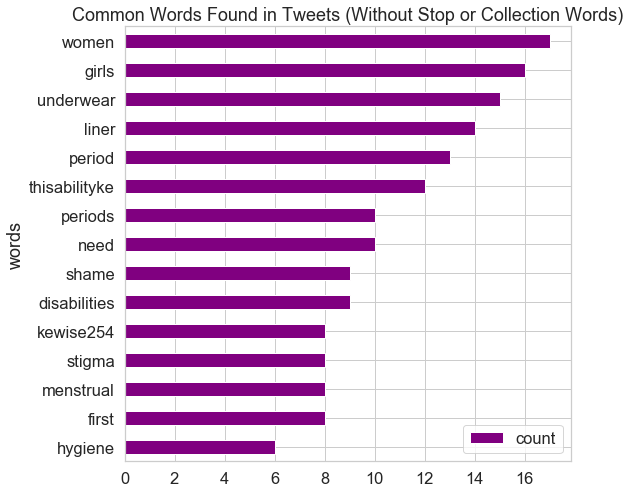

In [30]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

## Pair of words that frequently occur together. 

In [31]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram[0]

[('tuesday', 'liner'), ('liner', 'underwear')]

In [32]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('liner', 'underwear'), 13),
 (('underwear', 'shirt'), 5),
 (('women', 'girls'), 5),
 (('first', 'period'), 4),
 (('women', 'disabilities'), 4),
 (('menstrual', 'hygiene'), 4),
 (('period', 'enough'), 3),
 (('enough', 'detailed'), 3),
 (('detailed', 'information'), 3),
 (('information', 'go'), 3),
 (('go', 'thisabilityke'), 3),
 (('thisabilityke', 'goteana'), 3),
 (('thisabilityke', 'brekko'), 3),
 (('need', 'take'), 3),
 (('school', 'women'), 3),
 (('women', 'stigma'), 3),
 (('friday', 'liner'), 3),
 (('girls', 'disabilities'), 3),
 (('disabilities', 'experience'), 3),
 (('tuesday', 'liner'), 2)]

In [33]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(liner, underwear)",13
1,"(underwear, shirt)",5
2,"(women, girls)",5
3,"(first, period)",4
4,"(women, disabilities)",4
5,"(menstrual, hygiene)",4
6,"(period, enough)",3
7,"(enough, detailed)",3
8,"(detailed, information)",3
9,"(information, go)",3


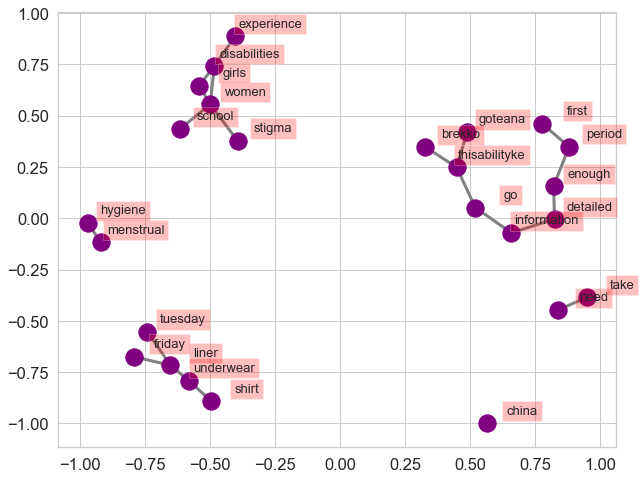

In [34]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

# Sentiment Analysis

In [35]:
from textblob import TextBlob

In [36]:
sentiment_objects = [TextBlob(tweet) for tweet in all_tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0,
 TextBlob("Tuesday ootd Liner 8inch gruffalo by daisyandbird Underwear grannypanties thegoldengirls by harebrained Dress by citychic rebelliousmenstruation endperiodshame bekindtoyourvulva"))

In [37]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.0,
 'Tuesday ootd Liner 8inch gruffalo by daisyandbird Underwear grannypanties thegoldengirls by harebrained Dress by citychic rebelliousmenstruation endperiodshame bekindtoyourvulva']

# Attaching the polarity.
## Polarity of more than 0 means a positive tweet.
## Polarity of less than 0 means a negative tweet.

In [38]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head(20)

,polarity,tweet
0,0.000000,Tuesday ootd Liner 8inch gruffalo by daisyandb...
1,0.216667,Ladies during your first menstruation period d...
2,0.298148,endperiodshame I was aware but my great fear w...
3,0.216667,Ladies during your first menstruation period d...
4,-0.033333,From pads tampons through to maternity wear Na...
5,0.000000,Sunday ootd Liner 7inch by gwyf Underwear blee...
6,0.000000,Finally got my shower ootd Liner 7inch octopus...
7,0.000000,Christmas stocking Monday 25th of November the...
8,0.250000,Find out how these women with disabilities han...
9,0.100000,Action needs to be taken Me and you need to ta...


# Sample positive tweets.

In [39]:
positive_sentiment = sentiment_df[(sentiment_df['polarity']> 0.2)]

In [40]:
for row in positive_sentiment['tweet'][5:10]:
    print(row)

Starting with you and I we need to take action by prioritizing Menstrual Hygiene which will be the most important action in keeping girls in school and women out of stigma Endperiodshame endthestigma MPyusufhassan OfficialJMbugua WomenstruateD CRINwire KeWISE254
Find out how these women with disabilities handled their first menstruation and what they wish they had known endperiodshame Brekko thisabilityke
Great news Inclusivity and participation should be encouraged EndPeriodShame EndPeriodPoverty Imitiaz254 KeWISE254 fawashsmiley
Starting with you and I we need to take action by prioritizing Menstrual Hygiene which will be the most important action in keeping girls in school and women out of stigma EndPeriodPoverty Endperiodshame UNICEF USAIDKenya OfficialJMbugua KoinangeJeff MPyusufhassan
oyoohabib KeWISE254 Do u know what research looks like before pointing fingers at innocent peopleImitiaz254 ignore him he is needs to look into what he is talking aboutendperiodpoverty endperiodsham

# Sample negative tweets.

In [41]:
negative_sentiment = sentiment_df[(sentiment_df['polarity']< -0.01)]

In [42]:
for row in negative_sentiment['tweet'][3:10]:
    print(row)

KeWISE254 you mean you guys failed to identify at least two creative minds in from Kenya to execute your ideas EndPeriodShame EndPeriodPoverty
Photographer who created images za End Period Shame YOU DID A VERY DISGUSTING TRASHY IMMATURE AMATEUR IMAGES No proper research was done on that idea You shamed the whole Africa KeWISE254 EndPeriodShame EndPeriodPoverty
What the Deuce xf0x9fx98x91 xf0x9fx98xb3 endperiodshame Huuwezo thisabilityke OK well at least they used fake blood ama xf0x9fxa4x94xf0x9fx98x90 Theres a guy who asked why they use blue liquid on those Always TV ads RamzZy xf0x9fx98x91xf0x9fx98xac
Theres an EndPeriodshame billboard on Transnational Plaza that is quite puzzling I like the message but why is there blood on the girls face What am I missing
The new periodemoji is out and I am bloody excited xf0x9fxa9xb8 xf0x9fxa9xb8xf0x9fxa9xb8xf0x9fxa9xb8xf0x9fxa9xb8xf0x9fxa9xb8xf0x9fxa9xb8 Well done to PlanUK and all of those who have been campaigning to EndPeriodShame
Shame stigma

In [43]:
# How the tweet's polarity is distributed 

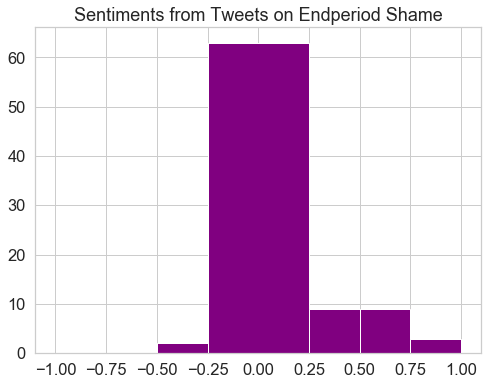

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Endperiod Shame")
plt.show()

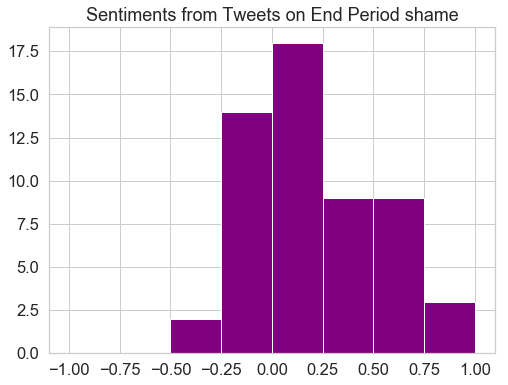

In [45]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on End Period shame")
plt.show()